# 🩺 Vitals Data Analysis
**Goal:** Analyze blood pressure and SPO2 trends for health monitoring.
- Time-series visualization
- Abnormal value detection
- Group-based summaries (e.g., by patient or diagnosis)


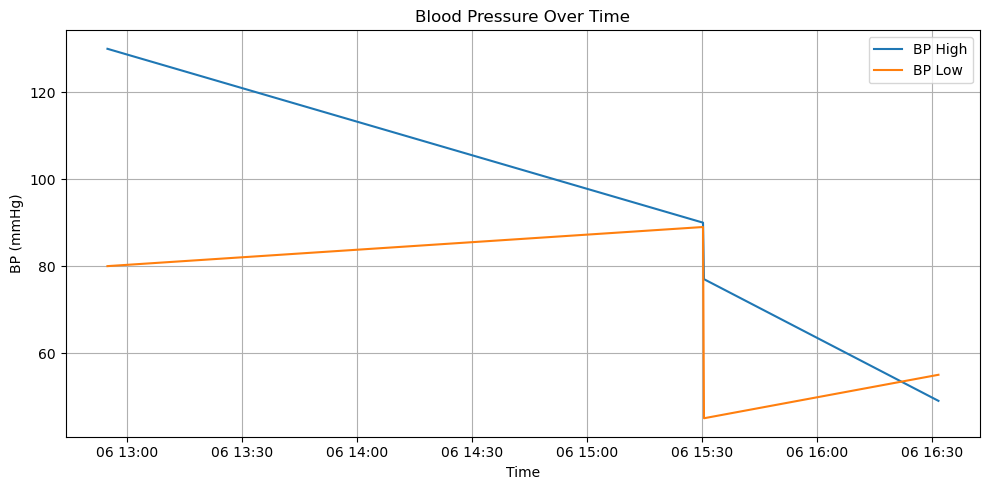

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV
df = pd.read_csv("vitals.csv")

# Clean column names
df.columns = df.columns.str.strip().str.lower()
df['recorded_on'] = pd.to_datetime('2025-07-06 ' + df['recorded on'].astype(str))

# Plot BP over time
plt.figure(figsize=(10, 5))
sns.lineplot(x='recorded_on', y='bp high', data=df, label='BP High')
sns.lineplot(x='recorded_on', y='bp low', data=df, label='BP Low')
plt.title('Blood Pressure Over Time')
plt.xlabel('Time')
plt.ylabel('BP (mmHg)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


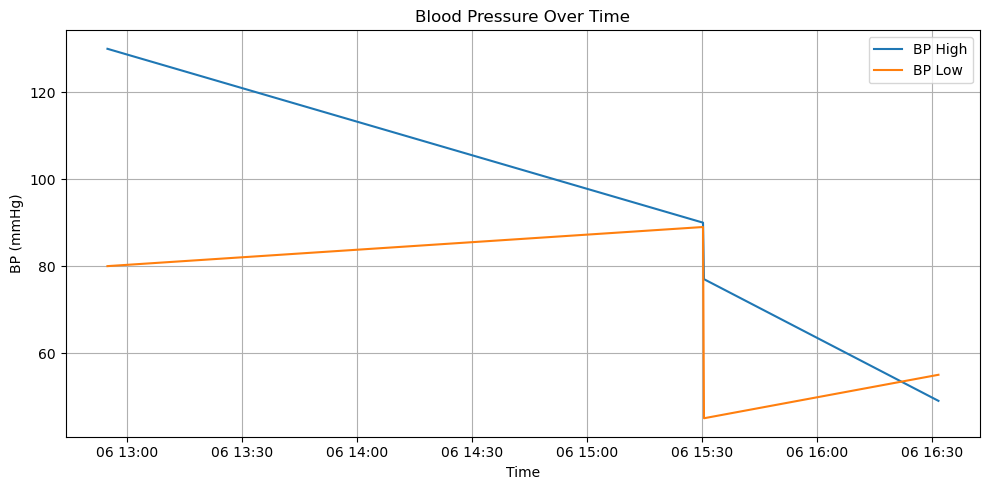

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('vitals.csv')
df.columns = df.columns.str.strip().str.lower()
df['recorded_on'] = pd.to_datetime('2025-07-06 ' + df['recorded on'].astype(str))

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x='recorded_on', y='bp high', data=df, label='BP High')
sns.lineplot(x='recorded_on', y='bp low', data=df, label='BP Low')
plt.title('Blood Pressure Over Time')
plt.xlabel('Time')
plt.ylabel('BP (mmHg)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


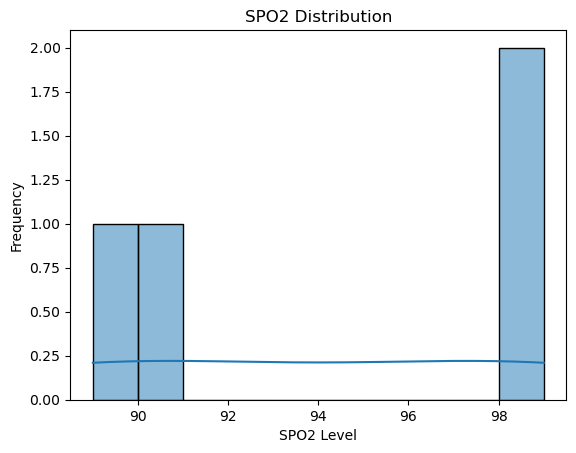

In [10]:
# SPO2 distribution
sns.histplot(df['spo2'], bins=10, kde=True)
plt.title('SPO2 Distribution')
plt.xlabel('SPO2 Level')
plt.ylabel('Frequency')
plt.show()

In [2]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [4]:
df = pd.read_csv('vitals.csv')
print(df.columns)

Index(['Patient Name', 'Phone', 'BP Low', 'BP High', 'SPO2', 'Recorded On'], dtype='object')


In [15]:
patients = pd.read_csv('patient.csv')
print(patients.head())


   1   John Doe     johndoe@example.com  9876543210  35    Male  \
0  2  Praneetha  praneethajaJ@gmail.com   909089066  23  Female   
1  3    Krishna       krishna@gmail.com  9080908070  33    Male   
2  4       Prem         prems@gmail.com  8989877656  44    Male   
3  5        ram         ram22@gmail.com  7890654567  22    Male   

      Hypertension  Requires daily monitoring  
0      Mouth ulcer                 Negligence  
1  Severe Backpain  Require Daily medication   
2            Sugar          Requires insulin   
3  Severe Headache   Require daily medication  


In [16]:
print(patients.columns)


Index(['1', 'John Doe', 'johndoe@example.com', '9876543210', '35', 'Male',
       'Hypertension', 'Requires daily monitoring'],
      dtype='object')


In [17]:
patients = pd.read_csv('patient.csv', header=None)

In [18]:
patients.columns = ['id', 'name', 'email', 'phone', 'age', 'gender', 'diagnosis', 'remarks']

In [19]:
print(patients.columns)

Index(['id', 'name', 'email', 'phone', 'age', 'gender', 'diagnosis',
       'remarks'],
      dtype='object')


In [20]:
patients = pd.read_csv('patient.csv')
print(patients.head())

   1   John Doe     johndoe@example.com  9876543210  35    Male  \
0  2  Praneetha  praneethajaJ@gmail.com   909089066  23  Female   
1  3    Krishna       krishna@gmail.com  9080908070  33    Male   
2  4       Prem         prems@gmail.com  8989877656  44    Male   
3  5        ram         ram22@gmail.com  7890654567  22    Male   

      Hypertension  Requires daily monitoring  
0      Mouth ulcer                 Negligence  
1  Severe Backpain  Require Daily medication   
2            Sugar          Requires insulin   
3  Severe Headache   Require daily medication  


In [21]:
patients = pd.read_csv('patient.csv', header=None)
patients.columns = ['id', 'name', 'email', 'phone', 'age', 'gender', 'diagnosis', 'remarks']

# Optional: clean up column names
patients.columns = patients.columns.str.strip().str.lower()

# Merge on phone
merged_df = df.merge(patients, on='phone')
merged_df.head()


,patient name,phone,bp low,bp high,spo2,recorded on,recorded_on,id,name,email,age,gender,diagnosis,remarks
0,ram,7890654567,55,49,90,2025-07-14 16:31:35.0,2025-07-06 16:31:35-14:00,5,ram,ram22@gmail.com,22,Male,Severe Headache,Require daily medication
1,John Doe,9876543210,45,77,89,2025-07-06 23:30:27.0,2025-07-06 23:30:27-06:00,1,John Doe,johndoe@example.com,35,Male,Hypertension,Requires daily monitoring
2,John Doe,9876543210,89,90,99,2025-07-06 23:30:12.0,2025-07-06 23:30:12-06:00,1,John Doe,johndoe@example.com,35,Male,Hypertension,Requires daily monitoring
3,John Doe,9876543210,80,130,98,2025-07-06 20:54:55.0,2025-07-06 20:54:55-06:00,1,John Doe,johndoe@example.com,35,Male,Hypertension,Requires daily monitoring


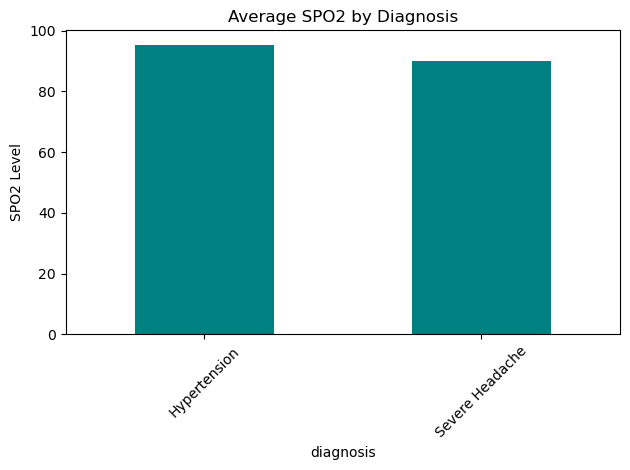

In [22]:
import matplotlib.pyplot as plt

merged_df.groupby('diagnosis')['spo2'].mean().plot(kind='bar', color='teal')
plt.title('Average SPO2 by Diagnosis')
plt.ylabel('SPO2 Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [23]:
merged_df['age_group'] = pd.cut(
    merged_df['age'],
    bins=[0, 25, 35, 45, 100],
    labels=['18–25', '26–35', '36–45', '45+']
)


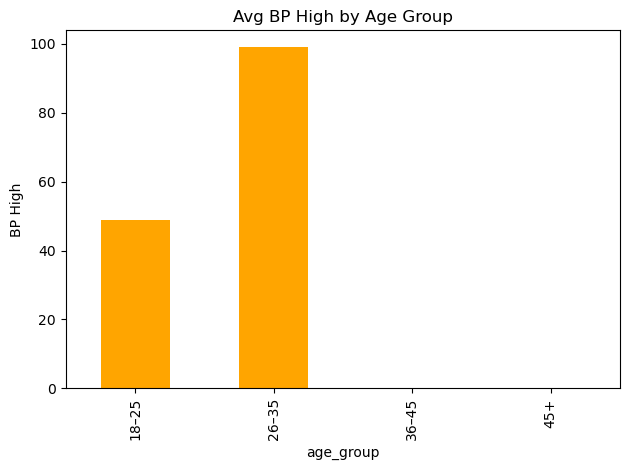

In [24]:
merged_df.groupby('age_group')['bp high'].mean().plot(kind='bar', color='orange')
plt.title('Avg BP High by Age Group')
plt.ylabel('BP High')
plt.tight_layout()
plt.show()


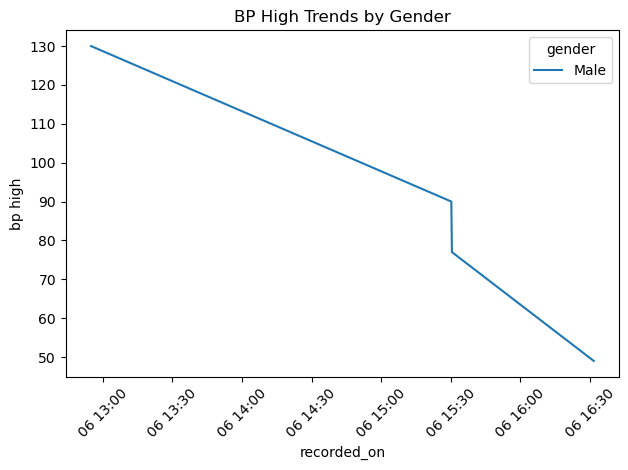

In [25]:
import seaborn as sns

sns.lineplot(data=merged_df, x='recorded_on', y='bp high', hue='gender')
plt.title('BP High Trends by Gender')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


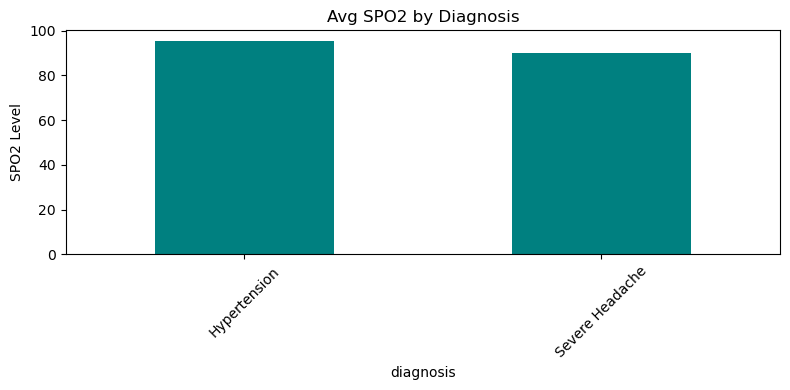

In [28]:
avg_spo2 = merged_df.groupby('diagnosis')['spo2'].mean()
avg_spo2.plot(kind='bar', figsize=(8, 4), color='teal')
plt.title('Avg SPO2 by Diagnosis')
plt.ylabel('SPO2 Level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
